In [1]:
import os

from lib.input.load import load_sequences, load_labels
from lib.model import LSTM, protCNN
from lib.output.save import save_history
from lib.output.plot import plot_history

'''
My solution of the assignment follows the procedure described in 'Protein Sequence Classification.
A case study on the Pfam dataset to classify protein families.' by Ronak Vijay available at
https://towardsdatascience.com/protein-sequence-classification-99c80d0ad2df.
'''

"\nMy solution of the assignment follows the procedure described in 'Protein Sequence Classification.\nA case study on the Pfam dataset to classify protein families.' by Ronak Vijay available at\nhttps://towardsdatascience.com/protein-sequence-classification-99c80d0ad2df.\n"

In [2]:
'''
The data files and label files in the correct format can be generated with the accompanying script "split_data.py".
'''
DATA_FOLDER = "apoptosis_damage"

TRAIN_PATH = DATA_FOLDER + "/train.fasta"
TEST_PATH = DATA_FOLDER + "/test.fasta"
VALIDATE_PATH = DATA_FOLDER + "/validate.fasta"

TRAIN_LABELS_PATH = DATA_FOLDER + "/train_labels.txt"
TEST_LABELS_PATH = DATA_FOLDER + "/test_labels.txt"
VALIDATE_LABELS_PATH = DATA_FOLDER + "/validate_labels.txt"

In [3]:
'''
Experiment settings.
The individual NNs are configured in "lib/model/LTSM.py" and "lib/model/protCNN.py".
'''
MODEL = protCNN # LSTM or protCNN
MAX_SEQUENCE_LENGTH = 100
TRAIN_EPOCHS = 10 # 33 for LSTM, 10 for protCNN
BATCH_SIZE = 256

RUN_NAME = DATA_FOLDER + "_" + \
    ("LSTM" if MODEL == LSTM else "protCNN") + \
    "_l" + str(MAX_SEQUENCE_LENGTH) + \
    "_e" + str(TRAIN_EPOCHS) +\
    "_b" + str(BATCH_SIZE)
HISTORY_PATH = "./results/" + RUN_NAME + "_trainHistoryDict"

In [4]:
train = load_sequences(TRAIN_PATH, MAX_SEQUENCE_LENGTH,
                       categorical=MODEL == protCNN)
train_labels = load_labels(TRAIN_LABELS_PATH)
test = load_sequences(TEST_PATH, MAX_SEQUENCE_LENGTH,
                      categorical=MODEL == protCNN)
test_labels = load_labels(TEST_LABELS_PATH)

model = MODEL.init_model(MAX_SEQUENCE_LENGTH, train_labels.shape[1])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 21)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 100, 128)     2816        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 100, 128)    512         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 100, 128)     0           ['batch_normalization[0][0]']

In [5]:
history = model.fit(x=train,
                    y=train_labels,
                    batch_size=BATCH_SIZE,
                    epochs=TRAIN_EPOCHS,
                    validation_data=(test, test_labels))

Epoch 1/10
8/8 [==============================] - 10s 643ms/step - loss: 2.0833 - accuracy: 0.4965 - val_loss: 1.2234 - val_accuracy: 0.4000
Epoch 2/10
8/8 [==============================] - 4s 544ms/step - loss: 1.4292 - accuracy: 0.5898 - val_loss: 1.2138 - val_accuracy: 0.4955
Epoch 3/10
8/8 [==============================] - 5s 640ms/step - loss: 1.1849 - accuracy: 0.6744 - val_loss: 1.2102 - val_accuracy: 0.4864
Epoch 4/10
8/8 [==============================] - 5s 606ms/step - loss: 1.0982 - accuracy: 0.7165 - val_loss: 1.2065 - val_accuracy: 0.4636
Epoch 5/10
8/8 [==============================] - 5s 675ms/step - loss: 0.9878 - accuracy: 0.7774 - val_loss: 1.1993 - val_accuracy: 0.5136
Epoch 6/10
8/8 [==============================] - 5s 569ms/step - loss: 0.9326 - accuracy: 0.8078 - val_loss: 1.1964 - val_accuracy: 0.4864
Epoch 7/10
8/8 [==============================] - 5s 562ms/step - loss: 0.8918 - accuracy: 0.8195 - val_loss: 1.1938 - val_accuracy: 0.5045
Epoch 8/10
8/8 [===

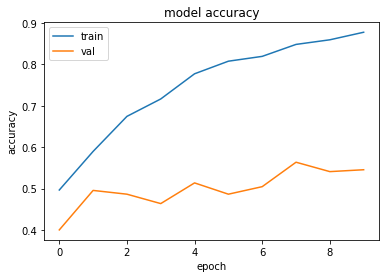

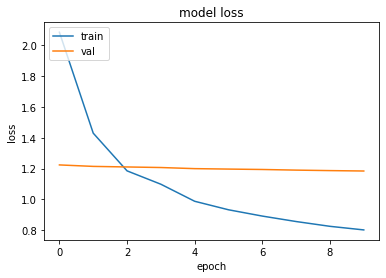

In [6]:
if not os.path.exists("results"):
    os.makedirs("results")
save_history(history, HISTORY_PATH)
plot_history(history, show=True, save_as="./results/" + RUN_NAME)

In [8]:
prediction = model.predict(test)

7/7 [==============================] - 1s 31ms/step


In [17]:
import numpy as np

np.sum(np.argmax(prediction, axis=1) == np.argmax(test_labels, axis=1)) / len(prediction)

120